In [1]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix

In [281]:
jj = 14

name = f'futures_b{jj}.csv'
df_b = pd.read_csv(name, header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'k1', 'k2']
k = 58-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_b.columns = cols2
# df = df.drop(columns=[f"val_{i}" for i in range(11, 21)]+[f"val_{i}" for i in range(31, 71)])
df_h = pd.read_csv(f'futures_t{jj}.csv', header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'k1', 'k2']
k = 58-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_h.columns = cols2
# df = df.drop(columns=[f"val_{i}" for i in range(11, 21)]+[f"val_{i}" for i in range(31, 71)])
ds = pd.concat([df_h, df_b], axis=0).drop_duplicates().dropna()
# ds = ds.drop(columns=[f"val_{i}" for i in range(11, 21)]+[f"val_{i}" for i in range(31, 71)])
# ds = ds.drop(columns=["val_9","val_10","val_19","val_20","val_29","val_30","val_39","val_40","val_49","val_50",])

lim1, lim2 = 0.3, 1.3

ds1 = ds[ds.target2>lim1]
ds2 = ds[ds.target2<-lim1]

ds = pd.concat([ds1, ds2])
ds = ds[ds.target2<lim2]
ds = ds[ds.target2>-lim2]

# k1_ = 6
# k2_ = 500

# ds = ds[ds.k1<=k1_]
# ds = ds[ds.k2<=k2_]

D = {}
dss = []
for i in [4, 5, 6, 7, 8]:
    dl = ds[ds.n==i]
    dss.append(dl)
    D[i]=dl
for d in D:
    dx = D[d]
    print(d, dx.shape[0])
print(ds.shape)
ds = pd.concat(dss)
ds

4 3950
5 3943
6 3937
7 3930
8 3919
(19679, 58)


,coin,target2,target1,n,diff1,diff2,k1,k2,val_1,val_2,...,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49,val_50
20,DOGE,0.506439,1,4,0.582559,1.948258,6,7,0.459096,0.540904,...,0.368726,0.631274,0.471015,0.528985,0.489751,0.510249,0.490699,0.509301,0.504111,0.495889
30,DOGE,0.708792,1,4,0.391138,1.033582,7,5,0.464504,0.535496,...,0.538559,0.461441,0.544167,0.455833,0.536514,0.463486,0.545872,0.454128,0.516428,0.483572
50,DOGE,0.827208,1,4,0.022579,0.266278,5,9,0.534102,0.465898,...,0.435475,0.564525,0.468943,0.531057,0.502508,0.497492,0.481111,0.518889,0.455501,0.544499
60,DOGE,0.509772,1,4,0.015578,0.367561,7,7,0.514036,0.485964,...,0.543122,0.456878,0.545766,0.454234,0.528665,0.471335,0.504359,0.495641,0.492514,0.507486
75,DOGE,0.738798,1,4,0.333488,1.166352,7,11,0.525716,0.474284,...,0.535526,0.464474,0.479748,0.520252,0.508809,0.491191,0.534512,0.465488,0.512355,0.487645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12254,XLM,-1.262074,0,8,1.171400,1.574163,7,5,0.519357,0.480643,...,0.542431,0.457569,0.555286,0.444714,0.460606,0.539394,0.451742,0.548258,0.493983,0.506017
12279,XLM,-0.800392,0,8,0.948544,1.067637,9,9,0.477232,0.522768,...,0.499734,0.500266,0.548261,0.451739,0.556529,0.443471,0.483266,0.516734,0.483910,0.516090
12619,XLM,-0.616898,0,8,1.019513,1.393575,12,3,0.546068,0.453932,...,0.482570,0.517430,0.547562,0.452438,0.564049,0.435951,0.480068,0.519932,0.462466,0.537534
12624,XLM,-0.404743,0,8,0.892554,1.777908,4,4,0.529409,0.470591,...,0.478184,0.521816,0.522995,0.477005,0.383353,0.616647,0.401522,0.598478,0.451412,0.548588


In [282]:
ds.groupby('n').size()

n
4    3950
5    3943
6    3937
7    3930
8    3919
dtype: int64

In [284]:
### data selected
mm = 4
ds = D[mm]
# ds.shape

# fs = []
# ss4 = ['ETH', 'DOGE', 'DOT', 'UNI', 'ADA', 'LINK', 'BCH', 'LTC', 'ETC', 'XRP', 'XLM']
# for coin in ss4:
#     # print(coin)
#     dr = ds[ds.coin==coin]
#     fs.append(dr)
    
# ds = pd.concat(fs)
ds

,coin,target2,target1,n,diff1,diff2,k1,k2,val_1,val_2,...,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49,val_50
20,DOGE,0.506439,1,4,0.582559,1.948258,6,7,0.459096,0.540904,...,0.368726,0.631274,0.471015,0.528985,0.489751,0.510249,0.490699,0.509301,0.504111,0.495889
30,DOGE,0.708792,1,4,0.391138,1.033582,7,5,0.464504,0.535496,...,0.538559,0.461441,0.544167,0.455833,0.536514,0.463486,0.545872,0.454128,0.516428,0.483572
50,DOGE,0.827208,1,4,0.022579,0.266278,5,9,0.534102,0.465898,...,0.435475,0.564525,0.468943,0.531057,0.502508,0.497492,0.481111,0.518889,0.455501,0.544499
60,DOGE,0.509772,1,4,0.015578,0.367561,7,7,0.514036,0.485964,...,0.543122,0.456878,0.545766,0.454234,0.528665,0.471335,0.504359,0.495641,0.492514,0.507486
75,DOGE,0.738798,1,4,0.333488,1.166352,7,11,0.525716,0.474284,...,0.535526,0.464474,0.479748,0.520252,0.508809,0.491191,0.534512,0.465488,0.512355,0.487645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,XLM,-1.262074,0,4,0.875847,1.188900,7,5,0.510582,0.489418,...,0.542431,0.457569,0.555286,0.444714,0.460606,0.539394,0.451742,0.548258,0.493983,0.506017
12275,XLM,-0.800392,0,4,0.527790,0.597326,9,9,0.491891,0.508109,...,0.499734,0.500266,0.548261,0.451739,0.556529,0.443471,0.483266,0.516734,0.483910,0.516090
12615,XLM,-0.616898,0,4,0.669983,1.091389,12,3,0.532362,0.467638,...,0.482570,0.517430,0.547562,0.452438,0.564049,0.435951,0.480068,0.519932,0.462466,0.537534
12620,XLM,-0.404743,0,4,0.892554,1.360664,4,4,0.506678,0.493322,...,0.478184,0.521816,0.522995,0.477005,0.383353,0.616647,0.401522,0.598478,0.451412,0.548588


In [285]:
from sklearn.model_selection import train_test_split

X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'k1', 'k2']).values
# X = ds.values
Y = ds.target1.values

kl = 0.25
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size=kl, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

((2962, 52), (988, 52), (2962,), (988,))

In [286]:
(y_test==1).sum(), (y_test==0).sum()

(497, 491)

In [287]:
# Build Linear Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
# Here lr.score first predict the y_test and then gives the accuracy
print("test accuracy {}".format(lr.score(x_test,y_test)))
lr_score=lr.score(x_test,y_test)

test accuracy 0.9676113360323887


              precision    recall  f1-score   support

           1       0.98      0.96      0.97       491
           2       0.96      0.98      0.97       497

    accuracy                           0.97       988
   macro avg       0.97      0.97      0.97       988
weighted avg       0.97      0.97      0.97       988



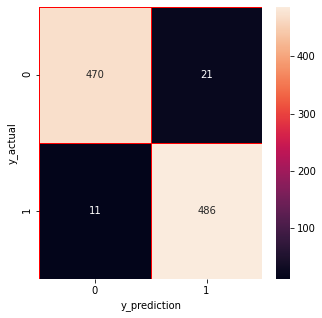

In [288]:
# Here we use confusion matrix to evaluate the linear regression algorithm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_prediction = lr.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of Linear regression model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

2 nn score: 0.944331983805668
0.944331983805668


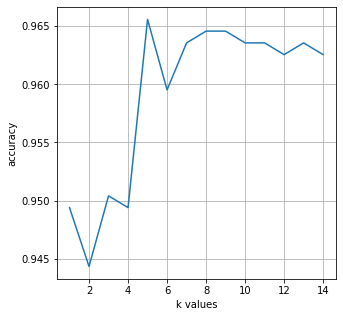

              precision    recall  f1-score   support

           1       0.91      0.99      0.95       491
           2       0.98      0.90      0.94       497

    accuracy                           0.94       988
   macro avg       0.95      0.94      0.94       988
weighted avg       0.95      0.94      0.94       988



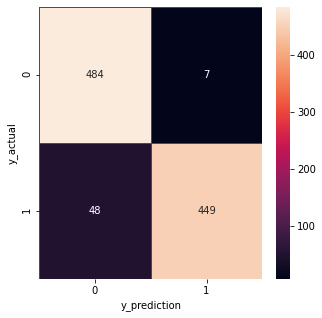

In [289]:
# KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier
k = 2
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("{} nn score: {}".format(k,knn.score(x_test,y_test)))

knn_score = knn.score(x_test,y_test)
print(knn_score)
# We can determine best k values with plotting k values versus accuracy
# Here we give values to k from 1 to 15 and calculate the accuracy each time,then plot them.
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.figure(figsize=(5, 5))
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()

y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of Linear regression model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

score:  0.9534412955465587
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       491
           2       0.95      0.96      0.95       497

    accuracy                           0.95       988
   macro avg       0.95      0.95      0.95       988
weighted avg       0.95      0.95      0.95       988



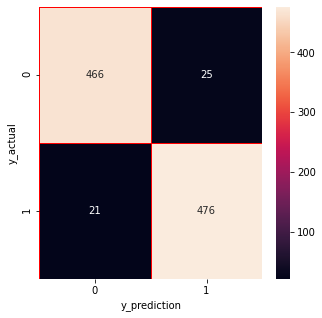

In [290]:
# Build Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

dt_score=dt.score(x_test,y_test)
from sklearn.metrics import confusion_matrix
y_prediction = dt.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

random forest algo result:  0.9412955465587044
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       491
           2       0.94      0.94      0.94       497

    accuracy                           0.94       988
   macro avg       0.94      0.94      0.94       988
weighted avg       0.94      0.94      0.94       988



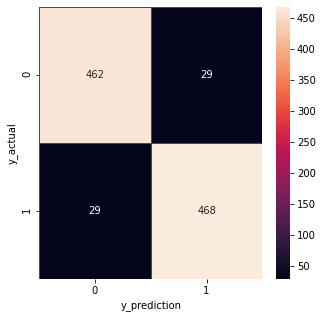

In [291]:
# Build Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
# n_estimators = 100 means this model will use 100 subsets.
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
print("random forest algo result: ", rf.score(x_test,y_test))

rf_score = rf.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Random Forest Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

print accuracy of svm algo:  0.9706477732793523
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       491
           2       0.96      0.98      0.97       497

    accuracy                           0.97       988
   macro avg       0.97      0.97      0.97       988
weighted avg       0.97      0.97      0.97       988



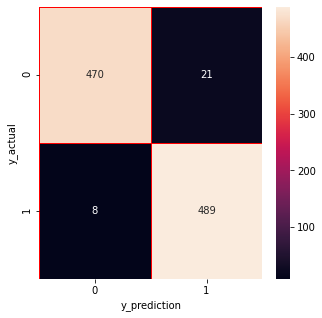

In [292]:
# Build Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(kernel ='rbf', random_state = 42)
svm.fit(x_train,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

svm_score = svm.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

print accuracy of naive bayes algo:  0.7165991902834008
              precision    recall  f1-score   support

           1       0.67      0.83      0.74       491
           2       0.78      0.61      0.68       497

    accuracy                           0.72       988
   macro avg       0.73      0.72      0.71       988
weighted avg       0.73      0.72      0.71       988



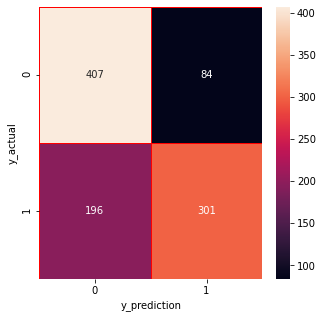

In [293]:
# Build Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

nb_score = nb.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = nb.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

(0.9676113360323887, 0.944331983805668, 0.9534412955465587, 0.9412955465587044, 0.9706477732793523, 0.7165991902834008)


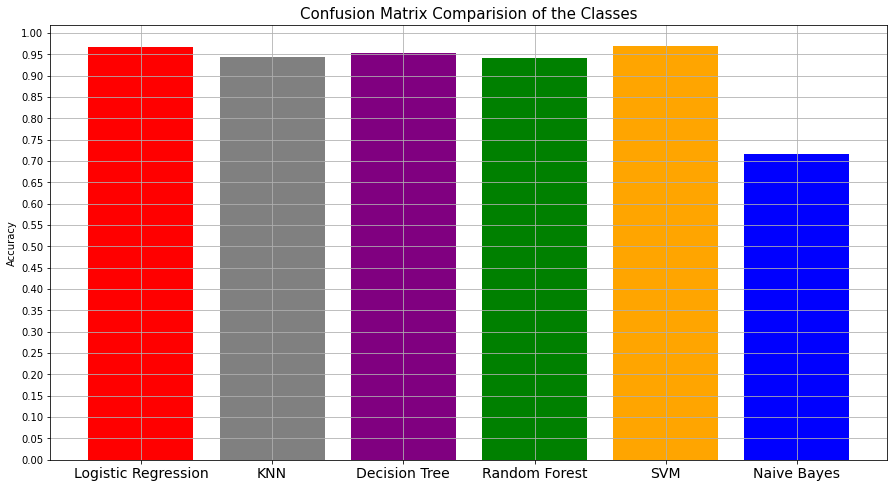

In [294]:
class_name = ("Logistic Regression","KNN","Decision Tree","Random Forest","SVM","Naive Bayes")
class_score = (lr_score,knn_score,dt_score,rf_score,svm_score,nb_score)
print(class_score)
y_pos= np.arange(len(class_score))
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(15,8))
plt.bar(y_pos,class_score,color=colors)
plt.xticks(y_pos,class_name,fontsize=14)
plt.yticks(np.arange(0.00, 1.05, step=0.05))
plt.ylabel('Accuracy')
plt.grid()
plt.title("Confusion Matrix Comparision of the Classes", fontsize=15)
# plt.savefig(f'acc_{coin}_{now1}.png')


In [295]:
lr.predict([x_test[0]])

array([0], dtype=int64)

In [296]:
lr.predict_proba([x_test[0]])

array([[9.99214136e-01, 7.85864056e-04]])

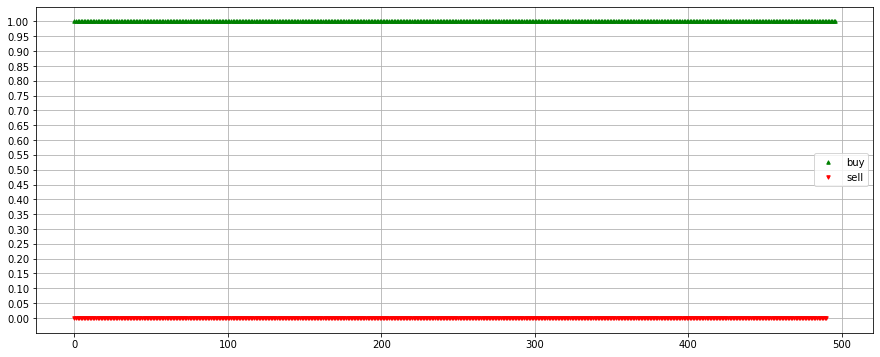

In [297]:
y_pred = rf.predict(x_test)
plt.figure(figsize=(15, 6))
plt.plot(y_pred[y_pred>=.5], "^", c='g', markersize=3.5)
plt.plot(y_pred[y_pred<.5], "v", c='r', markersize=3.5)
plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

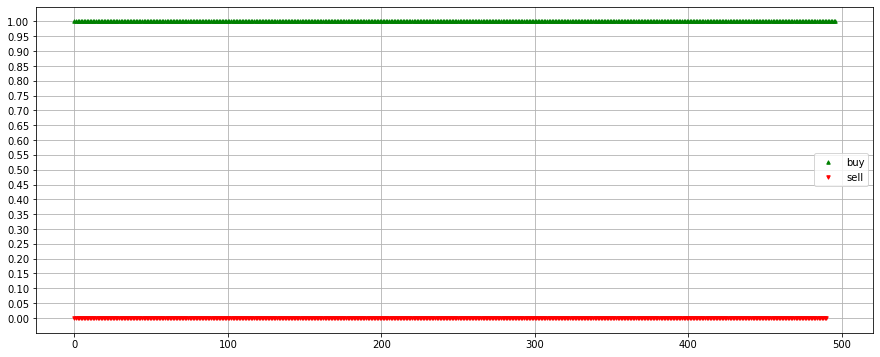

In [298]:
# y_pred = rf.predict(x_test)
plt.figure(figsize=(15, 6))
plt.plot(y_test[y_test>=.5], "^", c='g', markersize=3.5)
plt.plot(y_test[y_test<.5], "v", c='r', markersize=3.5)
plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()